In [1]:
import numpy as np
import matplotlib.pyplot as plt

# display plots in this notebook
%matplotlib inline

import sys

caffe_root = '../caffe/'
sys.path.insert(0, caffe_root + 'python')

import sys,os,os.path
sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['LD_LIBRARY_PATH']='/opt/OpenBLAS/lib/'

import caffe

In [2]:
labels = ['Alcohol', 'Caffeine', 'Other Beverages', 'Cooked Food',
          'Others Food', 'Processed Food', 'Cloudy', 'Sunny']

In [3]:
def pred(net, image_path, k=3):
    
    assert image_path
    
    mu = np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy')
    mu = mu.mean(1).mean(1)  # average over pixels to obtain the mean (BGR) pixel values

    transformer = caffe.io.Transformer({'data': net.blobs['data'].data.shape})

    transformer.set_transpose('data', (2,0,1))  # move image channels to outermost dimension
    transformer.set_mean('data', mu)            # subtract the dataset-mean value in each channel
    transformer.set_raw_scale('data', 255)      # rescale from [0, 1] to [0, 255]
    transformer.set_channel_swap('data', (2,1,0))  # swap channels from RGB to BGR

    net.blobs['data'].reshape(50,    # batch size
                          3,         # 3-channel (BGR) images
                          227, 227)  # image size is 227x227
    
    image = caffe.io.load_image(image_path)
    transformed_image = transformer.preprocess('data', image)
    plt.imshow(image)
    
    net.blobs['data'].data[...] = transformed_image
    output = net.forward()
    probs = output['prob'][0]
    top_k = (-probs).argsort()[:k]
    
    print('\n'.join('\t(%d) %5.2f%% %s' % (i+1, 100*probs[p], labels[p])
                    for i, p in enumerate(top_k)))

In [4]:
model_def = 'models/deploy.prototxt'
weights = 'models/migraine_classifier_iter_2000.caffemodel'

net = caffe.Net(model_def, weights, caffe.TEST)

	(1) 97.13% Sunny
	(2)  2.87% Cloudy
	(3)  0.00% Other Beverages


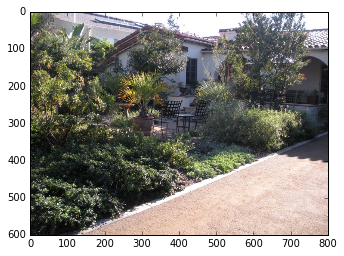

In [5]:
pred(net, 'data/val/Sunny/0888.jpg')

	(1) 67.81% Alcohol
	(2) 26.64% Caffeine
	(3)  3.47% Others Food


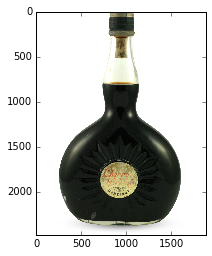

In [6]:
pred(net, 'data/val/Alcohol/n07902121_15411.JPEG')

	(1) 99.58% Other Beverages
	(2)  0.20% Sunny
	(3)  0.16% Caffeine


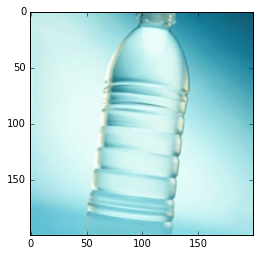

In [7]:
pred(net, 'data/val/Other_Beverages/n07936263_7909.JPEG')

	(1) 100.00% Cloudy
	(2)  0.00% Sunny
	(3)  0.00% Caffeine


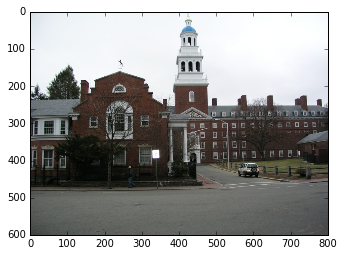

In [8]:
pred(net, 'data/val/Cloudy/0423.jpg')

	(1) 99.93% Cloudy
	(2)  0.07% Sunny
	(3)  0.00% Other Beverages


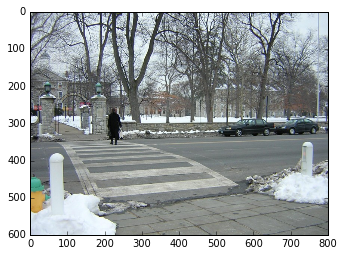

In [9]:
pred(net, 'data/val/Cloudy/0748.jpg')

	(1) 100.00% Others Food
	(2)  0.00% Cooked Food
	(3)  0.00% Caffeine


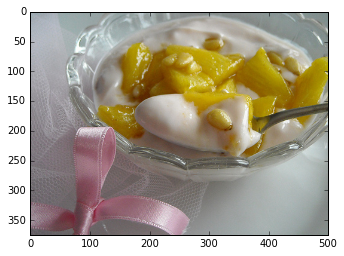

In [10]:
pred(net, 'data/val/Others_Food/n07609840_5212.JPEG')

	(1) 52.76% Caffeine
	(2) 46.16% Cooked Food
	(3)  1.01% Others Food


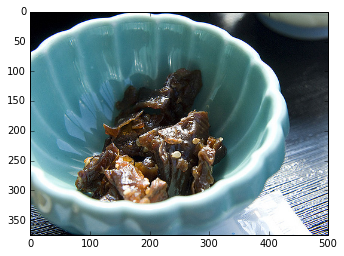

In [11]:
pred(net, 'data/val/Cooked_Food/n00021265_53018.JPEG')

	(1) 82.22% Cooked Food
	(2) 17.76% Processed Food
	(3)  0.01% Caffeine


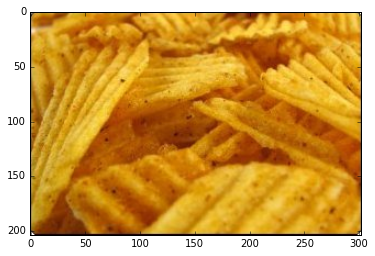

In [12]:
pred(net, 'data/val/Processed_Food/n07712382_1423.JPEG')